In [99]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

Generating Random Data

In [122]:
num_samples = 1000
data = {
    "Age": np.random.normal(loc=40,scale=10,size=num_samples).astype(int),
    "Income":np.random.normal(loc=50000,scale=10000,size=num_samples).astype(int)
}
df = pd.DataFrame(data)
df

,Age,Income
0,52,53253
1,36,43093
2,52,54141
3,29,41184
4,34,61051
...,...,...
995,45,55281
996,35,66356
997,47,47089
998,24,37755


In [129]:
# Introducing Null Values
df.loc[df.sample(frac=0.1).index, "Age"] = np.nan
# Introduce outliers
df.loc[df['Age'] > 70, 'Age'] = df['Age'] + 20
df

,Age,Income
0,52.0,53253
1,36.0,43093
2,52.0,54141
3,29.0,41184
4,NaN,61051
...,...,...
995,45.0,55281
996,35.0,66356
997,47.0,47089
998,24.0,37755


In [130]:
# Handling Null Values:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [131]:
# Handling outliers (using z-score for example)
z_scores = stats.zscore(df['Age'])
df_no_outliers = df[(z_scores < 3)]

In [132]:
df

,Age,Income
0,52.000000,53253
1,36.000000,43093
2,52.000000,54141
3,29.000000,41184
4,39.571111,61051
...,...,...
995,45.000000,55281
996,35.000000,66356
997,47.000000,47089
998,24.000000,37755


In [133]:
df["Age"] = df["Age"].round().astype(int)

In [134]:
df

,Age,Income
0,52,53253
1,36,43093
2,52,54141
3,29,41184
4,40,61051
...,...,...
995,45,55281
996,35,66356
997,47,47089
998,24,37755


In [136]:
num_bins = 5
bin_width = (df["Age"].max() - df["Age"].min())/ num_bins
bin_edges = [df['Age'].min() + i * bin_width for i in range(num_bins + 1)]
bin_labels = [f'{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f}' for i in range(num_bins)]

# Perform equal width binning using cut() function
df['Age_Bin'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels, right=False)

# Display the DataFrame with the new bin column
df

,Age,Income,Age_Bin
0,52,53253,52-72
1,36,43093,31-52
2,52,54141,52-72
3,29,41184,11-31
4,40,61051,31-52
...,...,...,...
995,45,55281,31-52
996,35,66356,31-52
997,47,47089,31-52
998,24,37755,11-31


In [137]:
bin_edges

[11.0, 31.4, 51.8, 72.19999999999999, 92.6, 113.0]

In [138]:
df['Age_Bin_qcut'] = pd.qcut(df['Age'], q=num_bins, labels=False, duplicates='drop')


In [139]:
df

,Age,Income,Age_Bin,Age_Bin_qcut
0,52,53253,52-72,4
1,36,43093,31-52,1
2,52,54141,52-72,4
3,29,41184,11-31,0
4,40,61051,31-52,2
...,...,...,...,...
995,45,55281,31-52,3
996,35,66356,31-52,1
997,47,47089,31-52,4
998,24,37755,11-31,0


In [140]:
scaler = MinMaxScaler()
df['Income_MinMax'] = scaler.fit_transform(df[['Income']])
df

,Age,Income,Age_Bin,Age_Bin_qcut,Income_MinMax
0,52,53253,52-72,4,0.511264
1,36,43093,31-52,1,0.350186
2,52,54141,52-72,4,0.525343
3,29,41184,11-31,0,0.319921
4,40,61051,31-52,2,0.634895
...,...,...,...,...,...
995,45,55281,31-52,3,0.543417
996,35,66356,31-52,1,0.719001
997,47,47089,31-52,4,0.413539
998,24,37755,11-31,0,0.265557


In [141]:
df['Income_Z_Score'] = scaler.fit_transform(df[['Income']])
df

,Age,Income,Age_Bin,Age_Bin_qcut,Income_MinMax,Income_Z_Score
0,52,53253,52-72,4,0.511264,0.511264
1,36,43093,31-52,1,0.350186,0.350186
2,52,54141,52-72,4,0.525343,0.525343
3,29,41184,11-31,0,0.319921,0.319921
4,40,61051,31-52,2,0.634895,0.634895
...,...,...,...,...,...,...
995,45,55281,31-52,3,0.543417,0.543417
996,35,66356,31-52,1,0.719001,0.719001
997,47,47089,31-52,4,0.413539,0.413539
998,24,37755,11-31,0,0.265557,0.265557


In [142]:
max_income_length = len(str(df['Income'].max()))

df['Income_DecimalScaled'] = df['Income'] / (10 ** max_income_length)
df

,Age,Income,Age_Bin,Age_Bin_qcut,Income_MinMax,Income_Z_Score,Income_DecimalScaled
0,52,53253,52-72,4,0.511264,0.511264,0.53253
1,36,43093,31-52,1,0.350186,0.350186,0.43093
2,52,54141,52-72,4,0.525343,0.525343,0.54141
3,29,41184,11-31,0,0.319921,0.319921,0.41184
4,40,61051,31-52,2,0.634895,0.634895,0.61051
...,...,...,...,...,...,...,...
995,45,55281,31-52,3,0.543417,0.543417,0.55281
996,35,66356,31-52,1,0.719001,0.719001,0.66356
997,47,47089,31-52,4,0.413539,0.413539,0.47089
998,24,37755,11-31,0,0.265557,0.265557,0.37755


In [143]:
five_num_summary = df['Income'].describe(percentiles=[.25, .5, .75])

five_num_summary = five_num_summary.round()
# Display the five-number summary
print("Five-Number Summary for Income:")
print(f"Minimum: {five_num_summary['min']}")
print(f"Q1 (25th percentile): {five_num_summary['25%']}")
print(f"Median (50th percentile): {five_num_summary['50%']}")
print(f"Q3 (75th percentile): {five_num_summary['75%']}")
print(f"Maximum: {five_num_summary['max']}")


Five-Number Summary for Income:
Minimum: 21005.0
Q1 (25th percentile): 43065.0
Median (50th percentile): 50100.0
Q3 (75th percentile): 57119.0
Maximum: 84080.0


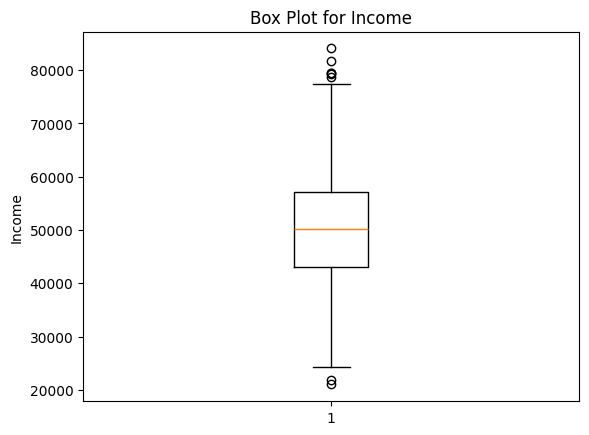

In [144]:
plt.boxplot(df['Income'])
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()
